In [2]:
# Check Transformed Nodule Coords Match Nodule In Preprocessed Image

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Nodule 550: 36, 83, 179, 11.7


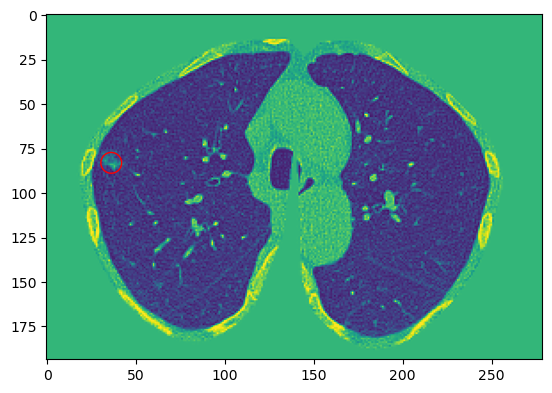

In [4]:
from pathlib import Path


img = np.load('/Users/john/Projects/SOTAEvaluationNoduleDetection/data/summit/preprocessed/summit-2734-ajn_Y0_BASELINE_A.npy')

nodule_coords = pd.concat(
    [pd.read_csv(f) for f in Path('/Users/john/Projects/TiCNet-main/annotations/summit/test_balanced').iterdir()]
)

nodule_coords = nodule_coords[nodule_coords['seriesuid'] == 'summit-2734-ajn_Y0_BASELINE_A']


for i, row in nodule_coords.iterrows():

    x, y, z, d = row['coordX'], row['coordY'], row['coordZ'], row['diameter_mm']
    x, y, z = int(x), int(y), int(z)

    print(f'Nodule {i}: {x}, {y}, {z}, {d}')

    plt.imshow(img[z])
    circle = plt.Circle((x, y), radius=d/2, color='red', fill=False)
    plt.gca().add_patch(circle)
    plt.show()